# Absenteeism at Work

Oscar Alonso, Jeremy Buban, and Joanna Rashid  
Group Term Project  
ENGR 121 Fall 2020

Last modified December 1, 2020

[Link to Google Colab Notebook](https://colab.research.google.com/drive/12z9sKWe5ojWrg33sHm0DzyhKv5pJgMWU?usp=sharing)

## Data source
UCI Machine Learning Repository, Absenteeism at work Data Set
(n.d.). Retrieved from https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.


> *The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management. (archive.ics.uci.edu)*



## Problem Statement and Background
When employees are absent from work, firms lose out on production, sometimes employees lose wages, and society loses overall productivity.  Since there are many stakeholders affected by workplace absences, an exploration of the factors which contribute to or co-occur with absences would be instructive.  Such information might inform firms’ employee benefit design, operational organization, and even hiring practices.  Analysis of this data might also influence the design of government social programs and public health initiatives.  This analysis might also yield interesting findings that either support or dispel common misconceptions about the reliability of workers of a particular type. 

# Data Import and Initial Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import statistics
import scipy
import calendar

# Modeling
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Hierarchical Clustering
from scipy.cluster import hierarchy as hc

# Test Train Split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Linear Regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm

##Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics
from sklearn.metrics import classification_report

#Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

# Model comparison
from tabulate import tabulate


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#data is hosted on github for ease of use of this notebook by multiple users
url = 'https://raw.githubusercontent.com/joannarashid/work_absenteeism/master/Absenteeism_at_work.csv'
df = pd.read_csv(url, sep = ';')

In [ ]:
df.shape

(740, 21)

In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Data types present in this data set:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

## Basic Data Characteristics

Below is a preliminary data exploration of attributes in this dataset and their relationship to the variable of interest, "Absenteeism time in hours."

In general, no single atribute has a very high correlation coefficient.  Coefficients are only useful for dummy and continuous variables.  The histograms and violin plots rendered below are only meaningful for attributes that have continuous numeric data.  The scatter plots rendered below are are not very useful.  However, they do reveal that the independent variable, "Absenteeism time in hours," is not entirely continuous.  It looks like those values are integers that are multiples of 5 or 10.

### Descriptive statistics

In [ ]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Constructing a coefficient matrix and displaying just the coefficents of "Absenteeism time in hours.":

In [ ]:
corr_df = df.corr(method ='pearson') 
corr_df["Absenteeism time in hours"]

ID                                -0.017997
Reason for absence                -0.173116
Month of absence                   0.024345
Day of the week                   -0.124361
Seasons                           -0.005615
Transportation expense             0.027585
Distance from Residence to Work   -0.088363
Service time                       0.019029
Age                                0.065760
Work load Average/day              0.024749
Hit target                         0.026695
Disciplinary failure              -0.124248
Education                         -0.046235
Son                                0.113756
Social drinker                     0.065067
Social smoker                     -0.008936
Pet                               -0.028277
Weight                             0.015789
Height                             0.144420
Body mass index                   -0.049719
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64

### Histograms

On first glance (considering only variables with truly numeric values), we can see that height, disciplinary failure, son(whether a person has children or not), and day of the week have coefficeints with the greatest magnitude.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


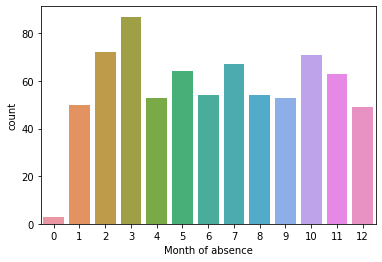

In [ ]:
sns.color_palette("husl", 9)
sns.countplot(df["Month of absence"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


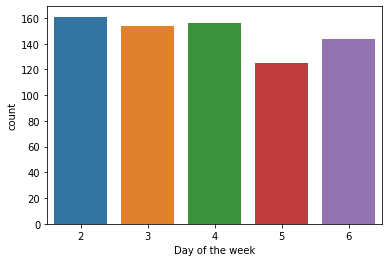

In [ ]:
sns.color_palette("husl", 9)
sns.countplot(df["Day of the week"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


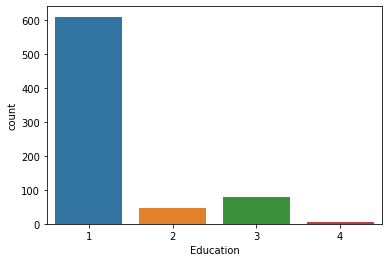

In [ ]:
sns.color_palette("husl", 9)
sns.countplot(df["Education"])

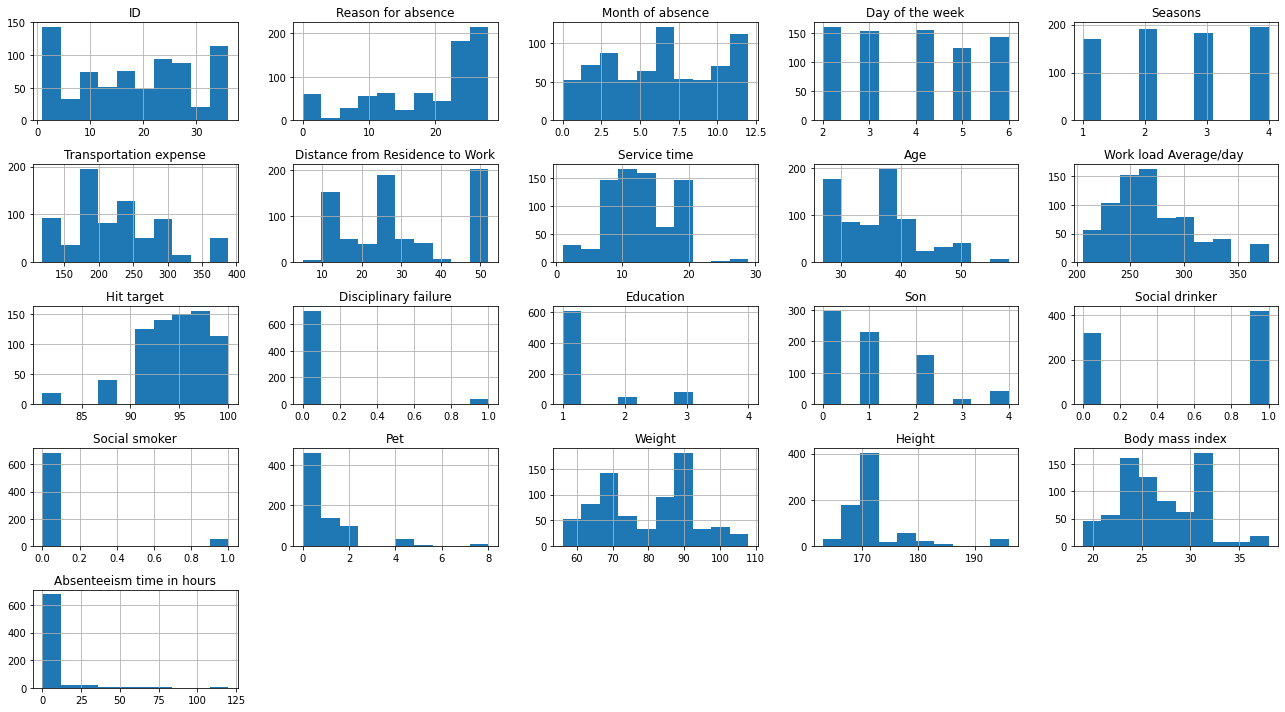

In [ ]:
histograms = df.hist(figsize=(18, 10))
plt.tight_layout()
plt.savefig("histograms.png")

### Scatterplots

Scatter plots of all variables plotted against our variable of interest, "Absenteeism time in hours."

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


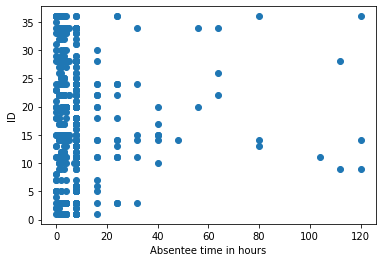

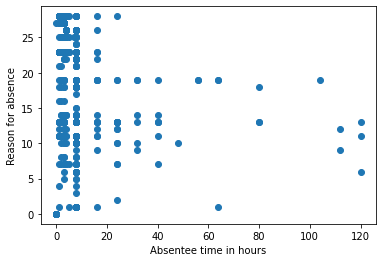

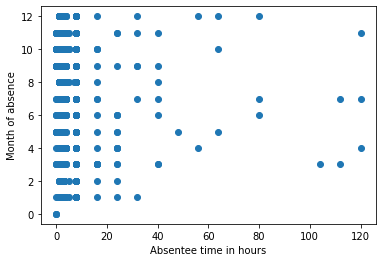

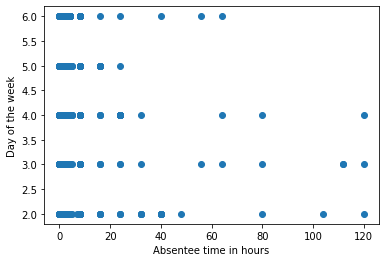

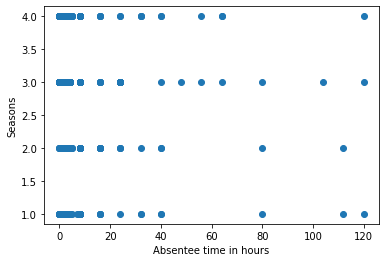

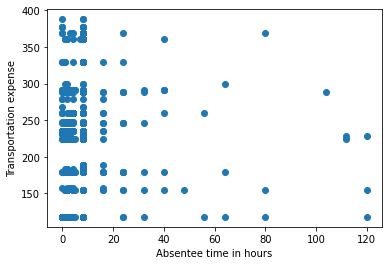

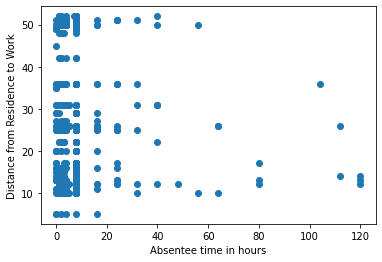

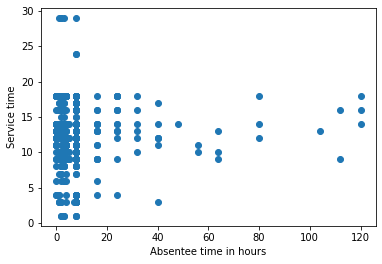

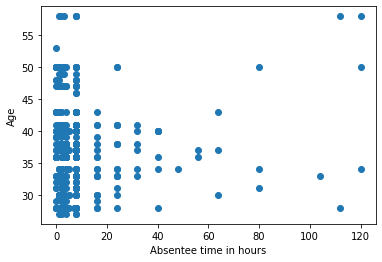

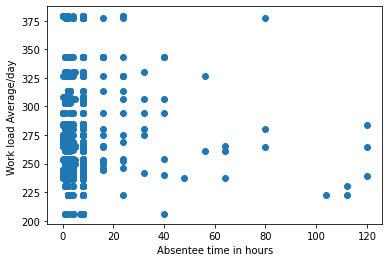

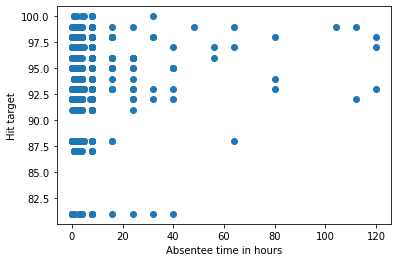

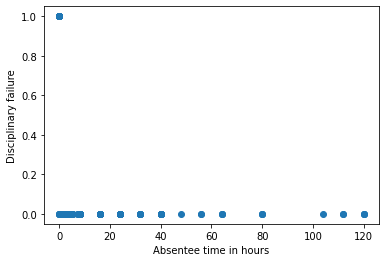

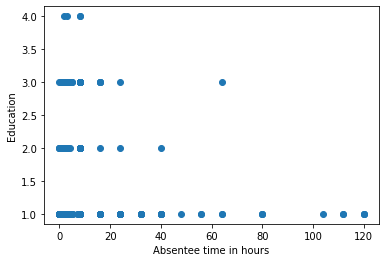

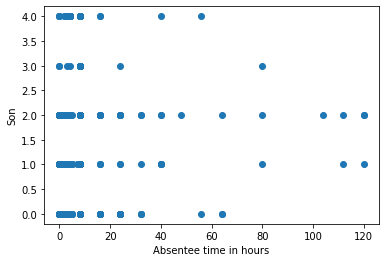

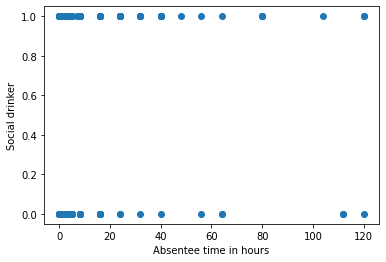

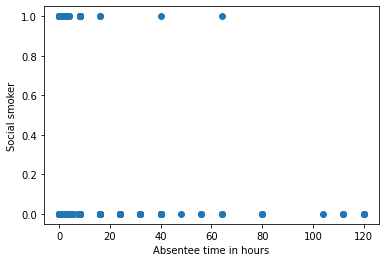

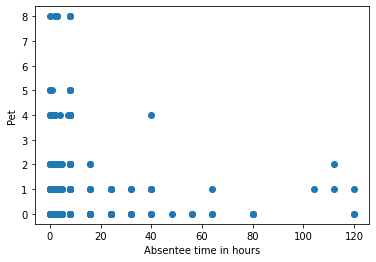

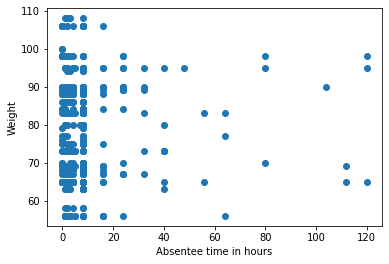

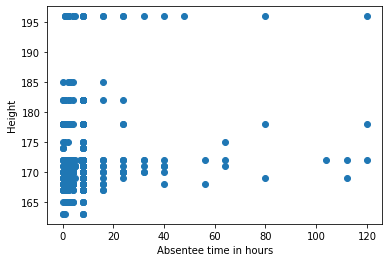

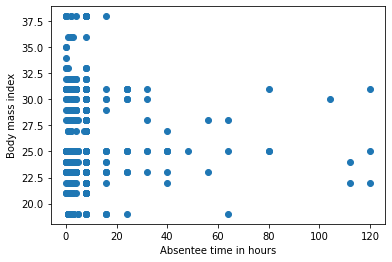

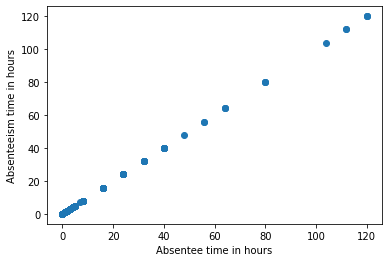

In [ ]:
for column in df:
  plt.figure()
  plt.subplot(1, 1, 1)
  plt.scatter(df['Absenteeism time in hours'], df[column])
  plt.xlabel('Absentee time in hours')
  plt.ylabel(str(column))

###Violin plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/

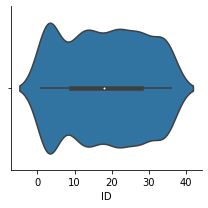

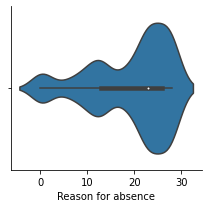

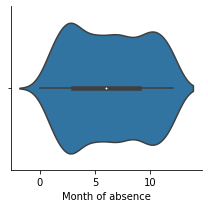

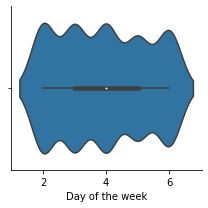

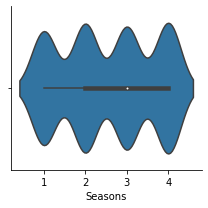

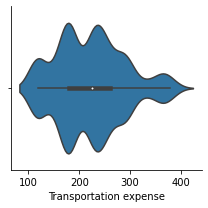

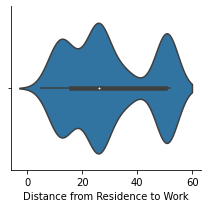

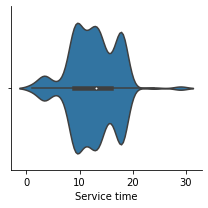

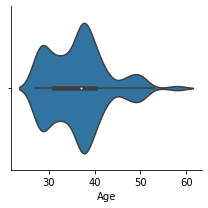

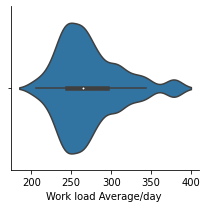

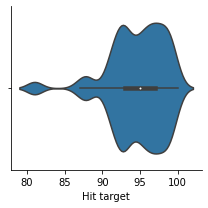

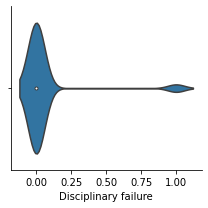

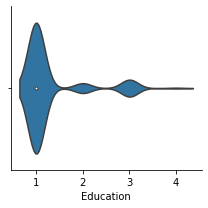

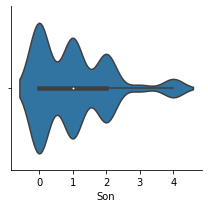

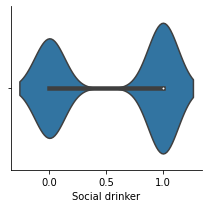

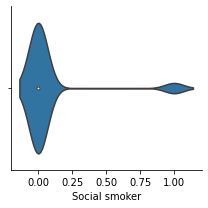

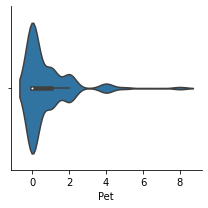

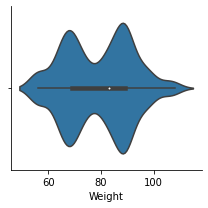

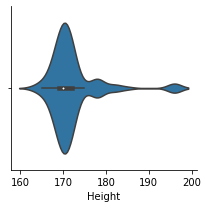

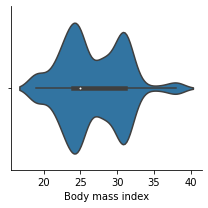

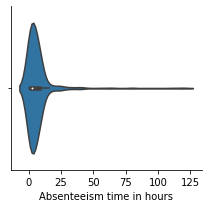

In [ ]:
for column in df:
  g = sns.FacetGrid(df)
  g.map(sns.violinplot, column)

### Reason for Absence Codes

In [ ]:
#importing reason codes
url = 'https://raw.githubusercontent.com/joannarashid/work_absenteeism/master/reason_codes.csv'
df_codes = pd.read_csv(url, sep = ',')

In [ ]:
df_codes.reset_index
df_codes.head()

,code,reason
0,1,Certain infectious and parasitic diseases
1,2,Neoplasms
2,3,Diseases of the blood and blood-forming organs...
3,4,"Endocrine, nutritional and metabolic diseases"
4,5,Mental and behavioural disorders


In [ ]:
df_counts = pd.DataFrame(data=df['Reason for absence'].value_counts())
df_counts.columns

Index(['Reason for absence'], dtype='object')

In [ ]:
df_counts.rename(columns={'Reason for absence':'count'}, inplace=True)
df_counts.head()

,count
23,149
28,112
27,69
13,55
0,43


In [ ]:
df_reasons = pd.merge(left = df_codes, right = df_counts, left_on = 'code', right_index = True, how = "inner")

In [ ]:
df_reasons
#todo - need to add total absenteeism time in hours for each reason code and make graph

,code,reason,count
0,1,Certain infectious and parasitic diseases,16
1,2,Neoplasms,1
2,3,Diseases of the blood and blood-forming organs...,1
3,4,"Endocrine, nutritional and metabolic diseases",2
4,5,Mental and behavioural disorders,3
5,6,Diseases of the nervous system,8
6,7,Diseases of the eye and adnexa,15
7,8,Diseases of the ear and mastoid process,6
8,9,Diseases of the circulatory system,4
9,10,Diseases of the respiratory system,25


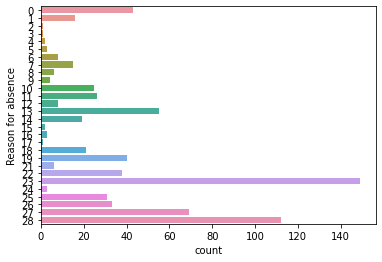

In [ ]:
#TODO Make horizontal bar graph with count of each reason code
sns.countplot(y = df['Reason for absence'])

# Data Cleaning and Feature Reduction 

### Data Cleaning

In [ ]:
#making a secondy df that is tidy (strings, bools, etc. where appropriate 
#for use in classification and data viz)
df_tidy = df

In [ ]:
df_tidy['Social drinker'] = df_tidy['Social drinker'].astype('bool')
df_tidy['Social smoker'] = df_tidy['Social smoker'].astype('bool')
df_tidy['Disciplinary failure'] = df_tidy['Disciplinary failure'].astype('bool')
df_tidy['Seasons'] = df_tidy['Seasons'].astype('category')
df_tidy['Education'] = df_tidy['Education'].astype('category')
df_tidy['Day of the week'] = df_tidy['Day of the week'].astype('category')
df_tidy['Month of absence'] = df_tidy['Month of absence'].astype('category')
df_tidy['Reason for absence'] = df_tidy['Reason for absence'].astype('category')

In [ ]:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df_tidy['season_name'] = df_tidy.Seasons.map(season_mapping)
df_tidy['season_name'] = df_tidy['season_name'].astype('category')
df_tidy.drop_duplicates(['Seasons', 'season_name'])[['Seasons','season_name']]

,Seasons,season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


In [ ]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
df_tidy['reason_text'] = df_tidy['Reason for absence'].map(reason_mapping)

In [ ]:
education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
df_tidy['Education_detail'] = df_tidy['Education'].map(education_mapping)
#df['Education_detail'] = df['Education_detail'].astype('category')
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
df_tidy['Education_detail'] = df_tidy['Education_detail'].astype(category_education)

In [ ]:
df_tidy['month_name'] =  df_tidy['Month of absence'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df_tidy.dropna(inplace= True)

In [ ]:
df_tidy.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,season_name,reason_text,Education_detail,month_name,abs_range
0,11,26,7,3,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,4,Summer,Unjustified absence,High School,Jul,Half-day absence
2,3,23,7,4,1,179,51,18,38,239.554,97,False,1,0,True,False,0,89,170,31,2,Summer,Medical consultation,High School,Jul,Half-day absence
3,7,7,7,5,1,279,5,14,39,239.554,97,False,1,2,True,True,0,68,168,24,4,Summer,Diseases of the eye and adnexa,High School,Jul,Half-day absence
4,11,23,7,5,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,2,Summer,Medical consultation,High School,Jul,Half-day absence
5,3,23,7,6,1,179,51,18,38,239.554,97,False,1,0,True,False,0,89,170,31,2,Summer,Medical consultation,High School,Jul,Half-day absence


### Feature Selection and Reduction

In [ ]:
#features omitting 'weight' and 'service time' sine they correlate with other variables
features_set = ['Reason for absence', 'Month of absence', 'Day of the week', 
                  'Seasons', 'Transportation expense', 
                  'Distance from Residence to Work', 'Age', 
                  'Work load Average/day ', 'Hit target', 'Disciplinary failure', 
                  'Education', 'Son', 'Social drinker',
                  'Social smoker', 'Pet','Height', 
                  'Body mass index']

# sorting into catagorical and continuous for use in models
categorical_set = ["Reason for absence","Month of absence",
                   "Day of the week","Seasons"]
                   
numerical_set = ["Transportation expense","Distance from Residence to Work",
                 "Age","Work load Average/day ","Hit target","Son",
                 "Pet","Height","Body mass index","Social drinker","Social smoker",
                 "Disciplinary failure","Education","Absenteeism time in hours"]

### Correlation

In [ ]:
df.corr()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Transportation expense,-0.224163,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749
Hit target,0.018789,-0.080193,-0.013865,-0.007840,-0.039224,-0.089445,1.000000,-0.147971,-0.014091,-0.102480,0.051254,0.007201,-0.044947,0.093267,-0.088939,0.026695
Disciplinary failure,0.004502,0.109222,-0.056527,-0.000221,0.104304,0.029026,-0.147971,1.000000,0.072096,0.051838,0.116748,0.018881,0.072225,-0.010498,0.079428,-0.124248
Son,0.002767,0.383001,0.054230,-0.047128,0.056984,0.027820,-0.014091,0.072096,1.000000,0.206376,0.156088,0.108917,-0.139552,-0.014208,-0.144150,0.113756
Social drinker,-0.451338,0.145117,0.452196,0.353141,0.213183,-0.033713,-0.102480,0.051838,0.206376,1.000000,-0.111678,-0.122780,0.378664,0.169951,0.323978,0.065067


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


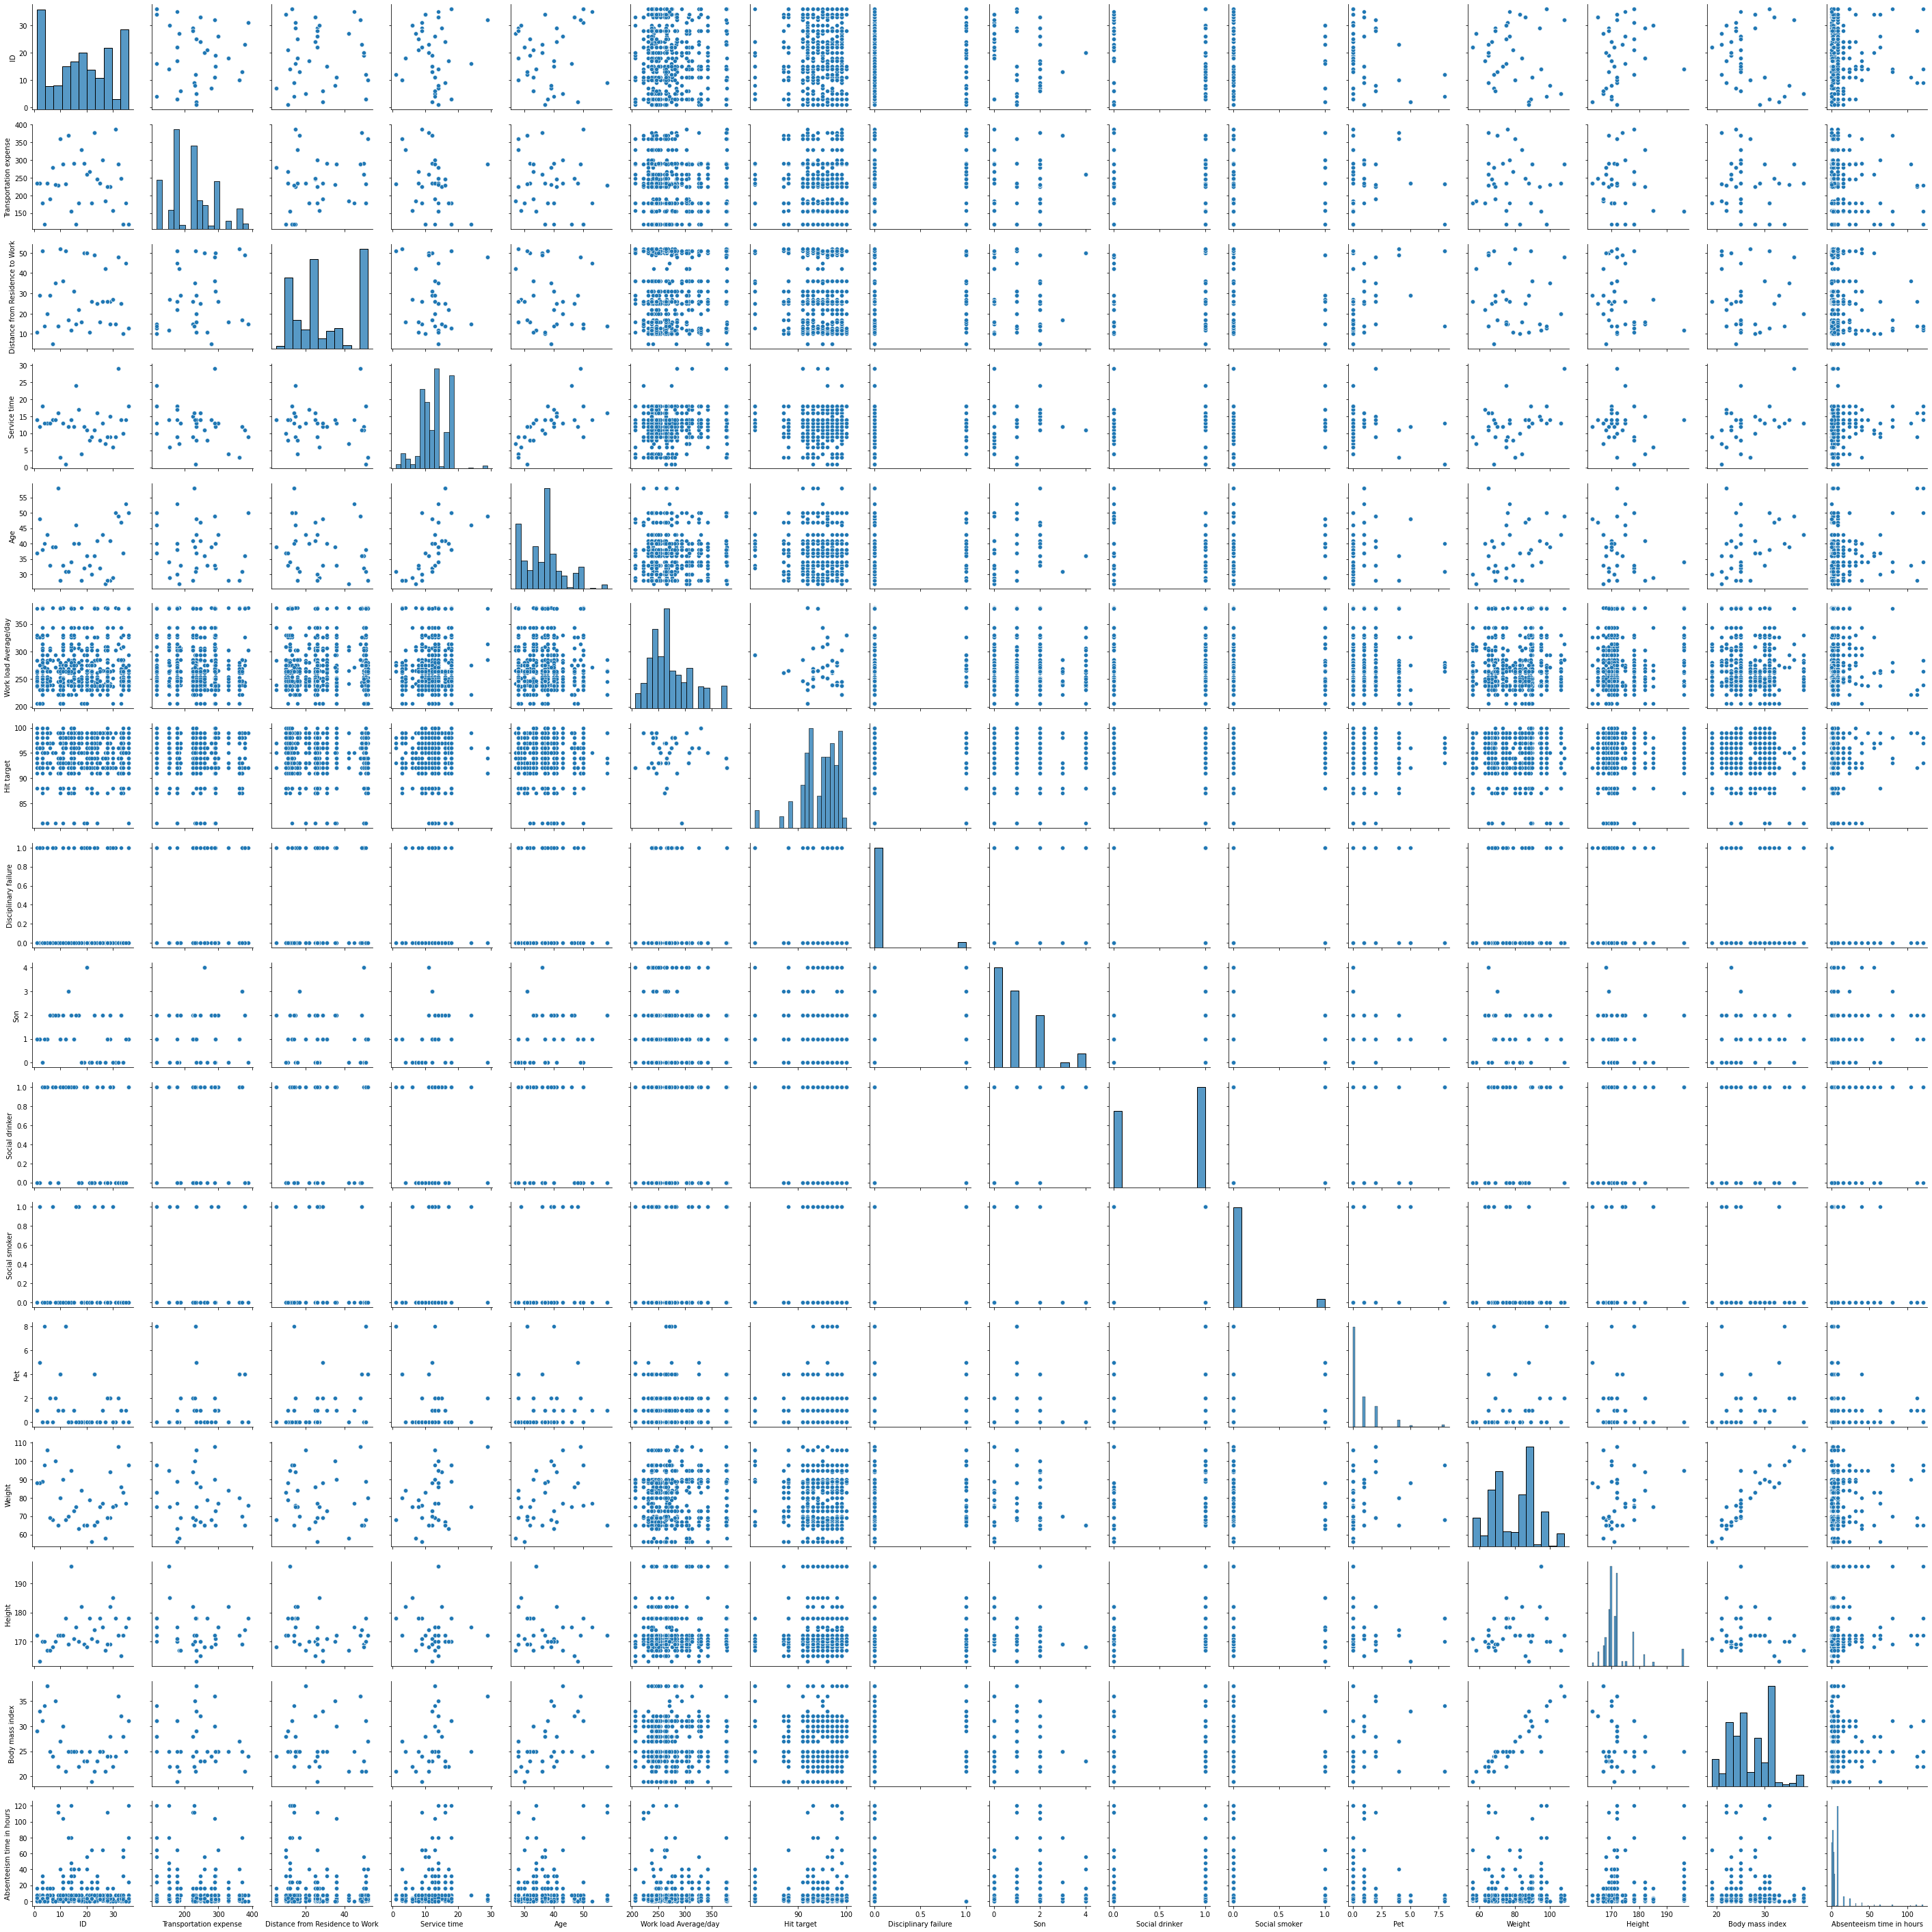

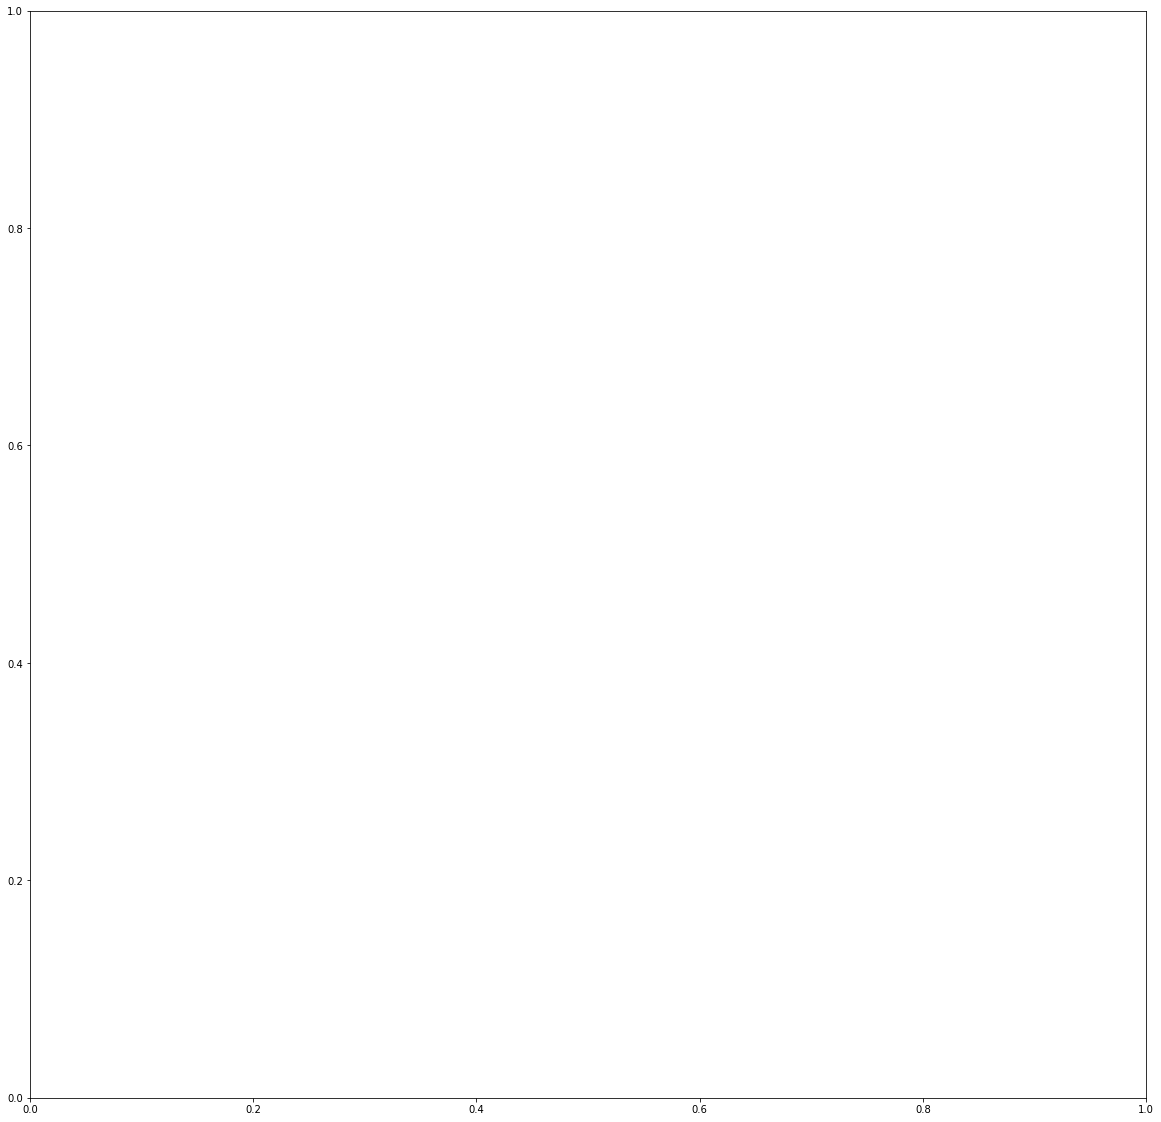

In [ ]:
sns.pairplot(df)
fig, ax = plt.subplots(figsize=(20, 20)) 

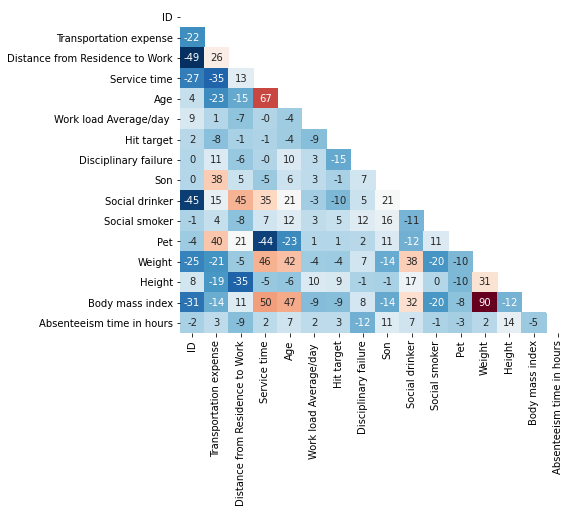

In [ ]:
correlations = df.corr()

plt.figure(figsize = (7,6))

#generate a mask for the upper triangle
#this is for clearer view of the correlations
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

#to make chart cleaner, multiply corr df with 100 before passing to the heatmap function
#pass the format to a whole number

heatmap = sns.heatmap(correlations * 100, cmap='RdBu_r', annot=True, fmt='.0f', mask=mask, cbar = False)
plt.show()

In [ ]:
heatmap.figure.savefig("heatmap.png")

# Modeling (Prediction of absenteeism)

## Hierarchical Clustering

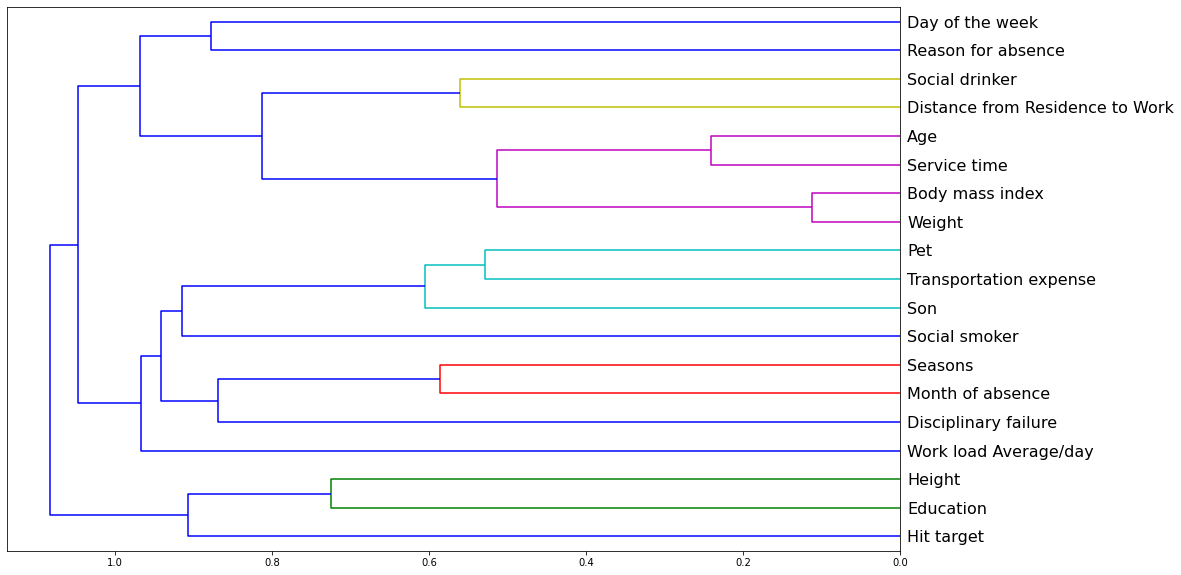

In [ ]:
df_features = df[['Reason for absence', 'Month of absence', 'Day of the week', 
                  'Seasons', 'Transportation expense', 
                  'Distance from Residence to Work', 'Service time', 'Age', 
                  'Work load Average/day ', 'Hit target', 'Disciplinary failure', 
                  'Education', 'Son', 'Social drinker',
                  'Social smoker', 'Pet', 'Weight','Height', 
                  'Body mass index' ]]

corr = np.round(scipy.stats.spearmanr(df_features).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_features.columns, orientation='left', leaf_font_size = 16)
plt.show()

This hierarchical cluster analysis allows us to see features that are jointly significant, most often co-occurring in observations, and/or are correlated.
 
The correlated variable identified here and in the correlation heat map will be omitted from regression analysis.


Hierarchical clustering source
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html


## Multi-variate Linear Regression

In [ ]:
url = 'https://raw.githubusercontent.com/joannarashid/work_absenteeism/master/Absenteeism_at_work.csv'
df = pd.read_csv(url, sep = ';')

In [ ]:
#establishing a set of faetures that will be used a explantory variables in the model
#dropping "weight" because it correlates with "Body mass index"
#dropping "Service time" because it correlated with "age"

linreg_set = ["Transportation expense","Distance from Residence to Work",
              "Age","Work load Average/day ","Hit target","Son",
              "Pet","Height","Body mass index","Social drinker","Social smoker",
              "Disciplinary failure","Education"]            

In [ ]:
modelLR = sm.OLS(df['Absenteeism time in hours'],
                 df[linreg_set], data = df).fit()
modelLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared (uncentered):                   0.265
Model:                                   OLS   Adj. R-squared (uncentered):              0.252
Method:                        Least Squares   F-statistic:                              20.17
Date:                       Thu, 10 Dec 2020   Prob (F-statistic):                    7.46e-41
Time:                               04:14:10   Log-Likelihood:                         -2940.7
No. Observations:                        740   AIC:                                      5907.
Df Residuals:                            727   BIC:                                      5967.
Df Model:                                 13                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense              0.0089      0.009      1.019      0.309      -0.008       0.026
Distance from Residence to Work    -0.1170      0.042     -2.794      0.005      -0.199      -0.035
Age                                 0.1799      0.093      1.940      0.053      -0.002       0.362
Work load Average/day              -0.0025      0.012     -0.200      0.841      -0.027       0.022
Hit target                         -0.0852      0.117     -0.731      0.465      -0.314       0.144
Son                                 0.8264      0.510      1.621      0.105      -0.174       1.827
Pet                                 0.0335      0.423      0.079      0.937      -0.798       0.865
Height                              0.1160      0.065      1.780      0.076      -0.012       0.244
Body mass index                    -0.3466      0.143     -2.424      0.016      -0.627      -0.066
Social drinker                      2.2830      1.372      1.663      0.097      -0.412       4.977
Social smoker                      -1.7576      1.984     -0.886      0.376      -5.653       2.138
Disciplinary failure               -8.7828      2.186     -4.018      0.000     -13.074      -4.492
Education                          -1.2734      0.852     -1.494      0.136      -2.947       0.400
==============================================================================
Omnibus:                      822.930   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45005.456
Skew:                           5.457   Prob(JB):                         0.00
Kurtosis:                      39.613   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#for accuracy comparsion table
acc_linreg = modelLR.rsquared
acc_linreg

0.2650656638987654

In [ ]:
#reducing features seeking model improvement
modelLR = sm.OLS(df['Absenteeism time in hours'],
                 df[["Distance from Residence to Work", "Son", "Height"]], data = df).fit()
modelLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared (uncentered):                   0.233
Model:                                   OLS   Adj. R-squared (uncentered):              0.230
Method:                        Least Squares   F-statistic:                              74.77
Date:                       Thu, 10 Dec 2020   Prob (F-statistic):                    3.16e-42
Time:                               04:14:10   Log-Likelihood:                         -2956.4
No. Observations:                        740   AIC:                                      5919.
Df Residuals:                            737   BIC:                                      5933.
Df Model:                                  3                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Distance from Residence to Work    -0.0841      0.032     -2.639      0.008      -0.147      -0.022
Son                                 1.4095      0.442      3.191      0.001       0.542       2.277
Height                              0.0466      0.007      7.152      0.000       0.034       0.059
==============================================================================
Omnibus:                      832.459   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46553.444
Skew:                           5.560   Prob(JB):                         0.00
Kurtosis:                      40.232   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Initialize the linear regression model
reg = linear_model.LinearRegression()

In [ ]:
#Train our model with the training data
x_train, x_test, y_train, y_test = train_test_split(df[linreg_set], 
                                                    df['Absenteeism time in hours'], 
                                                    test_size=0.2, 
                                                    random_state=42)
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(x_train, y_train)

0.07063182939239143

In [ ]:
#predicting y with x test set
y_pred = reg.predict(x_test)
reg.score(x_test, y_pred)

1.0

In [ ]:
print(mean_squared_error(y_test, y_pred))

104.08220287240562


## Splitting Data into Test and Train

In [ ]:
#data is hosted on github for ease of use of this notebook by multiple users
url = 'https://raw.githubusercontent.com/joannarashid/work_absenteeism/master/Absenteeism_at_work.csv'
df = pd.read_csv(url, sep = ';')

In [ ]:
#Splitting data into training and testing
y=df['Absenteeism time in hours']
X=df[features_set] #Extracting only the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("Number of unique ouput classes after preprocessing:",((np.unique(y_train))))

(740, 25)
(555, 17) (555,)
(185, 17) (185,)
Number of unique ouput classes after preprocessing: [  0   1   2   3   4   5   7   8  16  24  32  40  48  56  64  80 104 112
 120]


In [ ]:
#Preprocesssing(Normalizing features)
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)
X_scaled_train.shape

(555, 17)

## Random Forest (Continuous Target Variable)

In [ ]:
rf = RandomForestClassifier().fit(X_scaled_train, y_train)
y_pred = rf.predict(X_scaled_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("------------------------\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.43783783783783786
------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.19      0.17      0.18        24
           2       0.39      0.30      0.34        40
           3       0.37      0.40      0.38        25
           4       0.25      0.19      0.21        16
           5       0.00      0.00      0.00         2
           8       0.53      0.75      0.62        53
          16       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         5
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         0
          80       0.00      0.00      0.00         2

    accuracy                           0.44       185
   macro avg       0.21      0.22      0.21       185
weighted avg       0.40      0.44      0.41       185



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for accuracy comparsion table
acc_rfcont = metrics.accuracy_score(y_test, y_pred)
acc_rfcont

0.43783783783783786

## Random Forest Classification (Catagorical Target Variable)

In [ ]:
#Creating "bins" to make 'Absenteeism time in hours' catagorical instead of continuous
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['Half-day absence', 'Full-day absence', '2-day absence', '>2-day absence']
df_tidy['abs_range'] = pd.cut(df_tidy['Absenteeism time in hours'], abs_bins, labels=abs_names)

In [ ]:
#Creating the train and test sets
x = df_tidy[features_set]
y = df_tidy['abs_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7413793103448276
                  precision    recall  f1-score   support

   2-day absence       0.00      0.00      0.00         6
  >2-day absence       0.33      0.44      0.38         9
Full-day absence       0.76      0.48      0.59        58
Half-day absence       0.78      0.96      0.86       101

        accuracy                           0.74       174
       macro avg       0.47      0.47      0.46       174
    weighted avg       0.72      0.74      0.71       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for accuracy comparsion table
acc_rfcat = metrics.accuracy_score(y_test, y_pred)
acc_rfcat

0.7413793103448276

In [ ]:
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='navy')
plt.show()

SyntaxError: ignored

## Decision Tree Classifier

In [ ]:
#Splitting data into training and testing
y=df['Absenteeism time in hours']
X=df[features_set] #Extracting only the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("Number of unique ouput classes after preprocessing:",((np.unique(y_train))))

(696, 26)
(522, 17) (522,)
(174, 17) (174,)
Number of unique ouput classes after preprocessing: [  1   2   3   4   5   8  16  24  32  40  56  64  80 104 112 120]


In [ ]:
#Preprocesssing(Normalizing features)
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)
X_scaled_train.shape

(522, 17)

In [ ]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("------------------------\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.4367816091954023
------------------------

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.33      0.90      0.49        40
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.61      0.73      0.66        55
          16       0.00      0.00      0.00         6
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1

    accuracy                           0.44       174
   macro avg       0.07      0.12      0.08       174
weighted avg       0.27  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for accuracy comparsion table
acc_dtree = metrics.accuracy_score(y_test, y_pred)
acc_dtree

0.4367816091954023

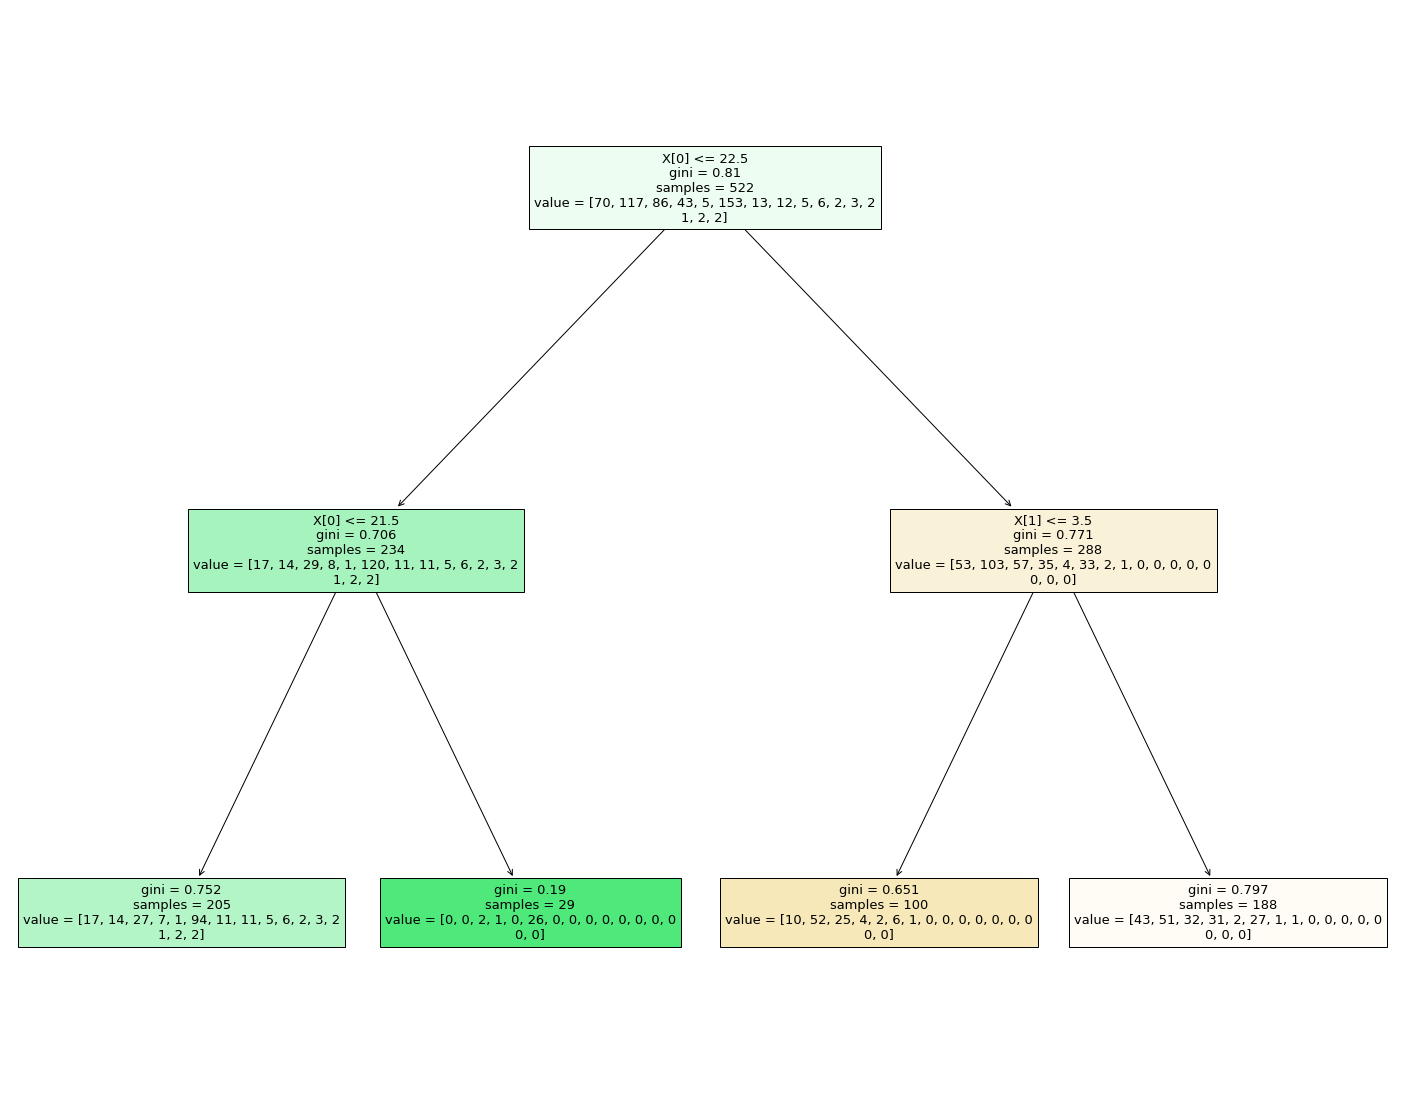

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_model, filled = True, feature_names= None)

# Model Comparison and Assesment

In [ ]:
table = [["Linear Regression (all features)",acc_linreg], 
         ["Random Forest (continuous)", acc_rfcont], 
         ["Random Forest (categorical)", acc_rfcat],
         ["Descision Tree", acc_dtree]]
print(tabulate(table, headers=["Model","Accuracy"]))

Model                               Accuracy
--------------------------------  ----------
Linear Regression (all features)    0.265066
Random Forest (continuous)          0.437838
Random Forest (categorical)         0.741379
Descision Tree                      0.436782


The Random Forest model with the target variable, 'Absenteeism time in hours', transformed into a categorical variable is the model with the highest accuracy.  This algorithm is well suited for both categorical features and targets, so it proved the most useful in predicting absenteeism.

# Additional Data Viz

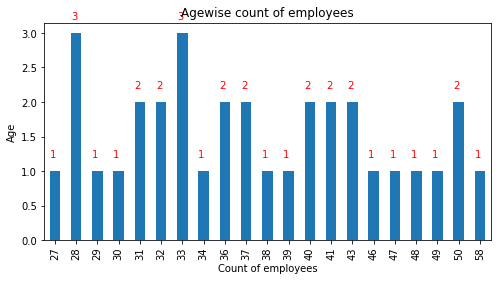

In [ ]:
age_count = df_tidy.groupby(['Age']).agg({'ID': pd.Series.nunique})
ax = age_count.plot(kind='bar', figsize=(8,4), legend=False)
for i, v in enumerate(age_count.values):
    ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Count of employees')
ax.set_ylabel('Age')
ax.set_title('Agewise count of employees')
plt.show()

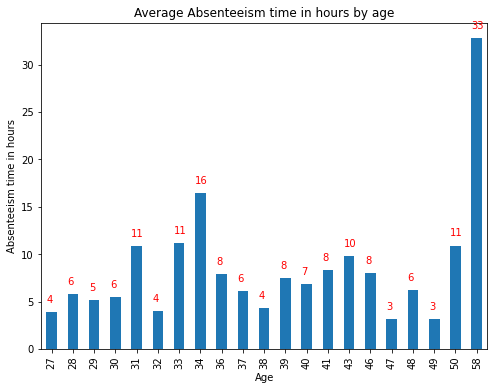

In [ ]:
age_abs = df_tidy.groupby('Age')[['Absenteeism time in hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

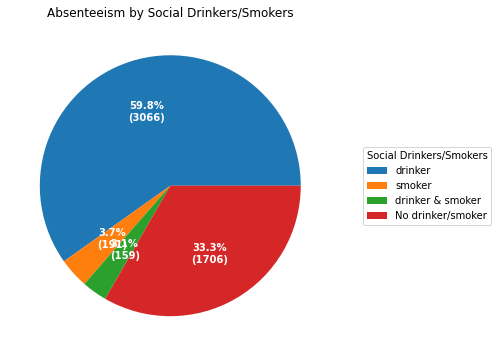

In [ ]:
drink_sum = df_tidy[(df_tidy['Social drinker'] == True) & (df_tidy['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = df_tidy[(df_tidy['Social drinker'] == False) & (df_tidy['Social smoker']==True)]['Absenteeism time in hours'].sum()
drink_smok_sum = df_tidy[(df_tidy['Social drinker'] == True) & (df_tidy['Social smoker']==True)]['Absenteeism time in hours'].sum()
abs_sum = df_tidy[(df_tidy['Social drinker'] == False) & (df_tidy['Social smoker']==False)]['Absenteeism time in hours'].sum()
absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
#plt.pie(absen, labels=pie_labels)
plt.show()

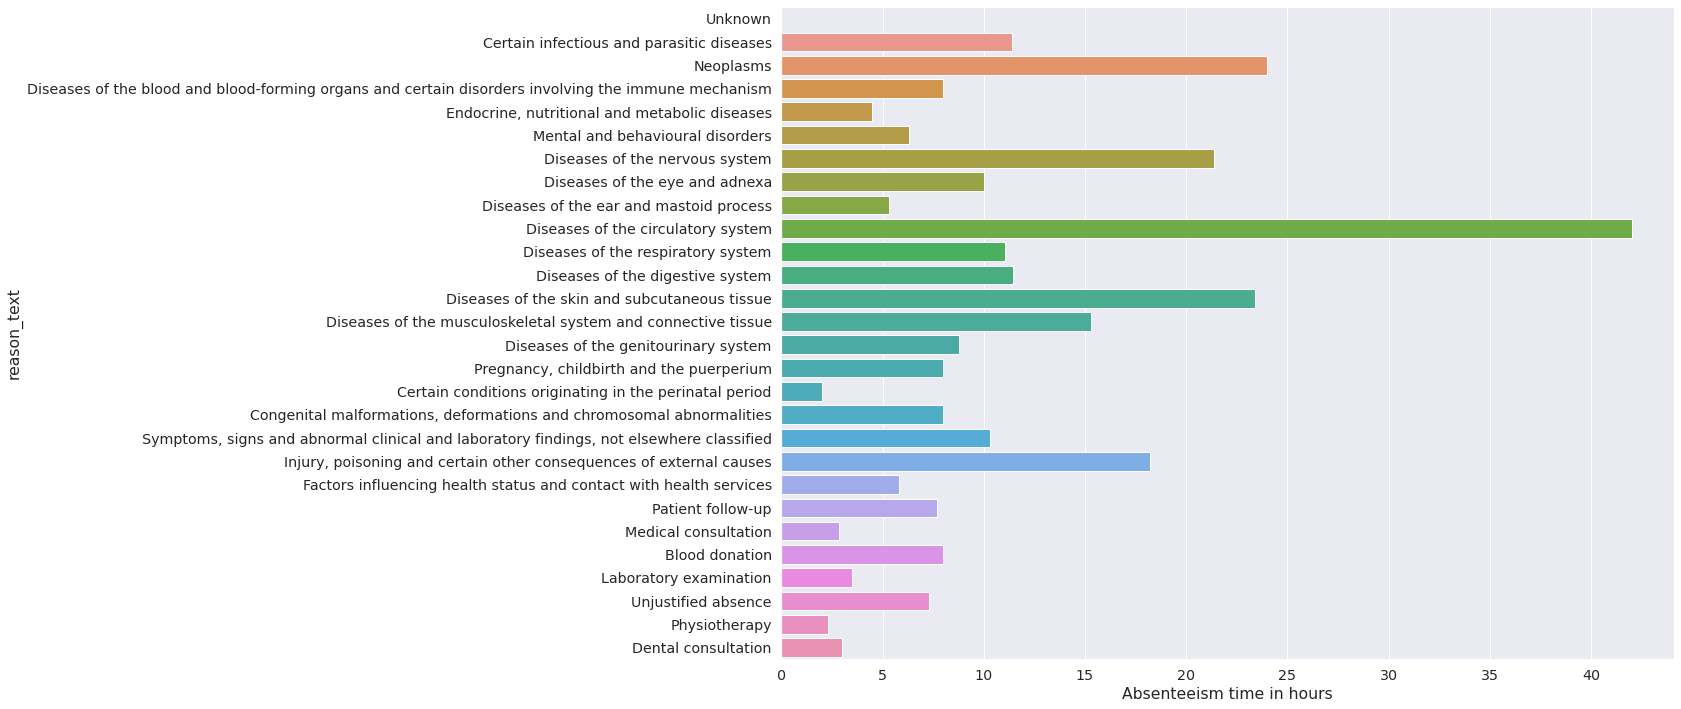

In [ ]:
sns.set(font_scale=1.3)
sns.color_palette("husl", 9)
plt.figure(figsize=(16, 12))
sns.barplot(y = df_tidy['reason_text'], x = df_tidy['Absenteeism time in hours'], ci=None)

In [ ]:
plt.savefig("reason_vs_hours.png")

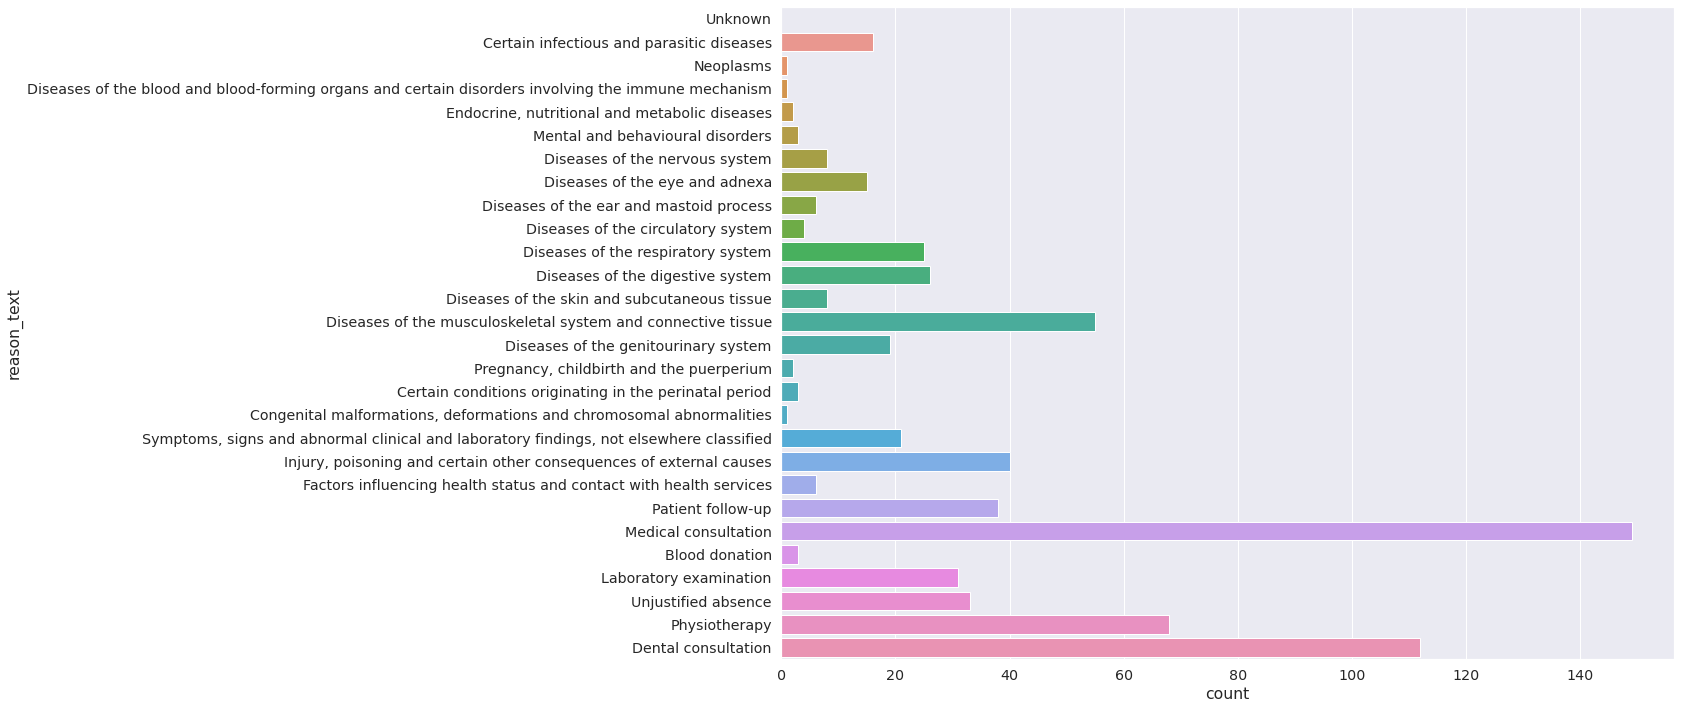

In [ ]:
sns.set(font_scale=1.3)
sns.color_palette("husl", 9)
plt.figure(figsize=(16, 12))
sns.countplot(y = df_tidy['reason_text'])

In [ ]:
plt.savefig("reason_vs_count.png")